In [1]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('/kaggle/input/advertising-dataset/Advertising.csv')
df.head(5)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


This data expresses sales according to the type of advertisement and the size of the cost .
The dataset contains 200 rows of 3 features [ TV , Radio , Newspaper] and target variable [Sales].

### EDA

In [3]:
df.shape

(200, 5)

In [4]:
df.isna().sum().sum()

0

In [5]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [6]:
types = ['TV', 'Newspaper', 'Radio']

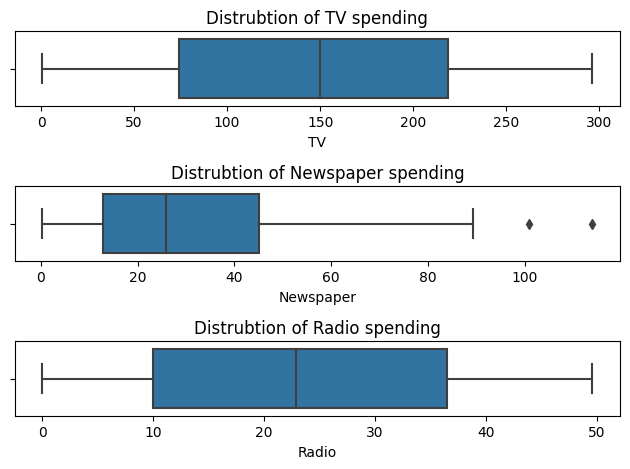

In [7]:
for count, t in enumerate(types):
    plt.subplot(3, 1, count+ 1)
    sns.boxplot(data=df, x=t)
    plt.title(f'Distrubtion of {t} spending')
plt.tight_layout()
plt.show()

In [8]:
df['total_cost'] = df['TV'] + df['Radio'] + df['Newspaper']

Best fitting line

In [9]:
X = np.array(df['total_cost'])
y = np.array(df['Sales'])
a, b = np.polyfit(X, y, 1)

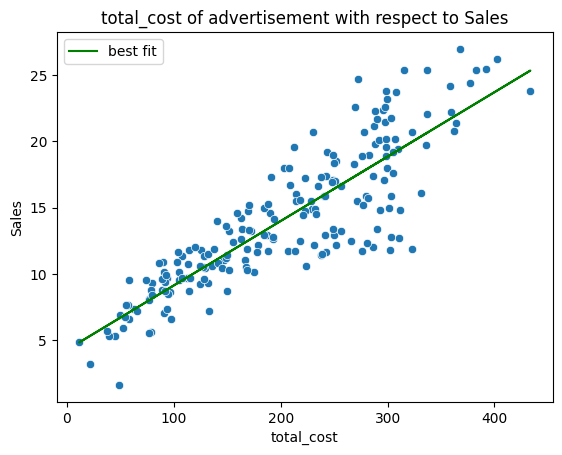

In [10]:
sns.scatterplot(data=df, x='total_cost', y='Sales')
plt.plot(X, a*X+b, color='green', label='best fit')
plt.title('total_cost of advertisement with respect to Sales')
plt.legend()
plt.show()

It look like there is a strong linear relationship between total_sales and Sales. Let's see if one type of advertisement gives better results that other!

Text(0.5, 1.0, 'Correlation matrix')

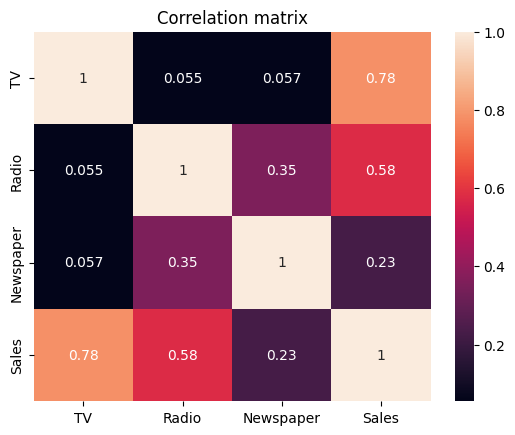

In [11]:
sns.heatmap(df.drop(columns=['total_cost', 'Unnamed: 0']).corr(), annot=True)
plt.title('Correlation matrix')

In [12]:
df.loc[(df['Sales'] < df['Sales'].quantile(0.25)) & (df['Sales'] > df['Sales'].quantile(0.2))]

,Unnamed: 0,TV,Radio,Newspaper,Sales,total_cost
38,39,43.1,26.7,35.1,10.1,104.9
145,146,140.3,1.9,9.0,10.3,151.2
149,150,44.7,25.8,20.6,10.1,91.1
157,158,149.8,1.3,24.3,10.1,175.4
186,187,139.5,2.1,26.6,10.3,168.2
191,192,75.5,10.8,6.0,9.9,92.3


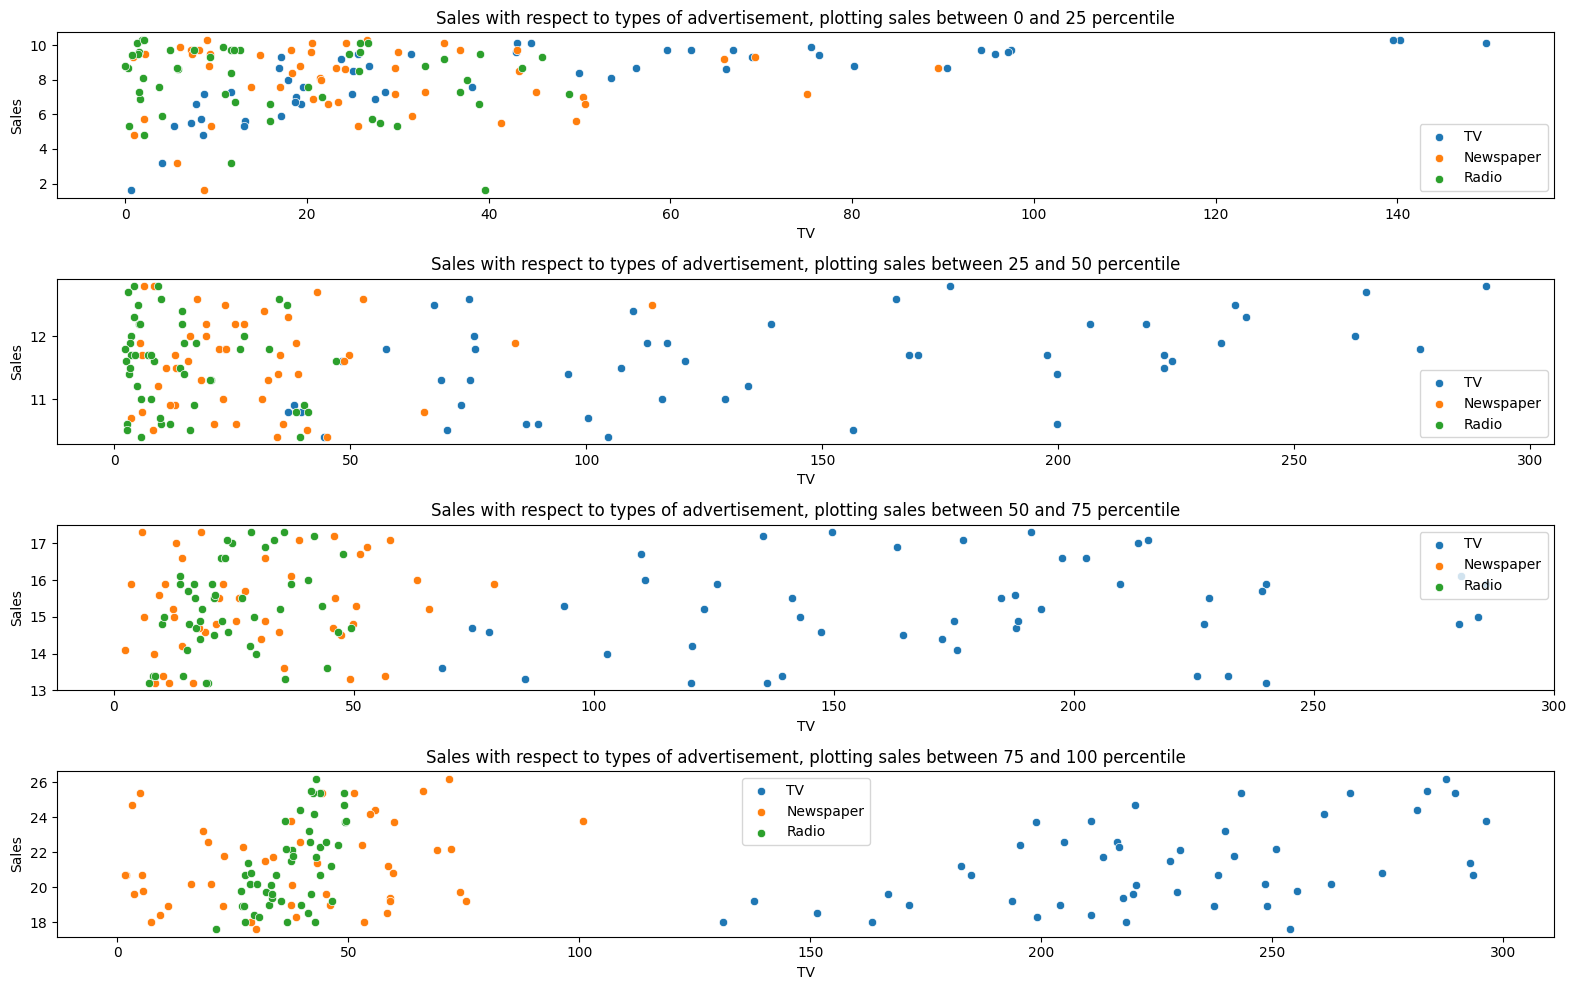

In [13]:
plt.figure(figsize=(16,10))
for count, split in enumerate([0.25, 0.50, 0.75, 1]):
    if count != 0:

        tmp_df = df.loc[(df['Sales'] < df['Sales'].quantile(split)) & (df['Sales'] > df['Sales'].quantile(split - 0.25))]
    else:
         tmp_df = df.loc[(df['Sales'] < df['Sales'].quantile(split))]
    plt.subplot(4,1,count + 1)
    for t in types:
        sns.scatterplot(data=tmp_df, x=t,y='Sales', label=t)
        plt.legend()
    plt.title(f'Sales with respect to types of advertisement, plotting sales between {int(((split - 0.25) * 100))} and {int((split * 100))} percentile')
plt.tight_layout()
plt.show()

When TV cost definitely moves with Sales value, its harder to tell for the rest.